In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy.stats import boxcox

In [2]:
df = pd.read_csv('../../Data/cell_data.csv')
df.head()

,Unnamed: 0,Case,Class,MorphologyV2Cell.AngleCh1,MorphologyV2Cell.AngleStatusCh1,MorphologyV2Cell.AreaCh1,MorphologyV2Cell.AreaStatusCh1,MorphologyV2Cell.AvgIntenCh1,MorphologyV2Cell.AvgIntenCh2,MorphologyV2Cell.AvgIntenCh3,...,MorphologyV2Cell.VarIntenCh1,MorphologyV2Cell.VarIntenCh3,MorphologyV2Cell.VarIntenCh4,MorphologyV2Cell.VarIntenStatusCh1,MorphologyV2Cell.VarIntenStatusCh3,MorphologyV2Cell.VarIntenStatusCh4,MorphologyV2Cell.WidthCh1,MorphologyV2Cell.WidthStatusCh1,MorphologyV2Cell.XCentroid,MorphologyV2Cell.YCentroid
0,207827637,Test,PS,143.247705,1,185,0,15.711864,3.954802,9.548023,...,12.474676,7.609035,2.714100,0,2,2,10.642974,2,42,14
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
4,207932455,Test,PS,2.887837,2,285,0,24.275735,111.415441,20.474265,...,15.407972,20.504288,45.450457,0,0,0,13.198561,0,283,159


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df = df[df['Case'] == 'Train']
df.drop(columns=['Case'], inplace=True)
df.head()

,Class,MorphologyV2Cell.AngleCh1,MorphologyV2Cell.AngleStatusCh1,MorphologyV2Cell.AreaCh1,MorphologyV2Cell.AreaStatusCh1,MorphologyV2Cell.AvgIntenCh1,MorphologyV2Cell.AvgIntenCh2,MorphologyV2Cell.AvgIntenCh3,MorphologyV2Cell.AvgIntenCh4,MorphologyV2Cell.AvgIntenStatusCh1,...,MorphologyV2Cell.VarIntenCh1,MorphologyV2Cell.VarIntenCh3,MorphologyV2Cell.VarIntenCh4,MorphologyV2Cell.VarIntenStatusCh1,MorphologyV2Cell.VarIntenStatusCh3,MorphologyV2Cell.VarIntenStatusCh4,MorphologyV2Cell.WidthCh1,MorphologyV2Cell.WidthStatusCh1,MorphologyV2Cell.XCentroid,MorphologyV2Cell.YCentroid
1,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,164.153453,0,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,106.696602,0,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,31.028070,0,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
11,WS,109.416426,0,256,0,18.828571,125.938776,13.600000,46.800000,0,...,13.922937,18.643027,40.331747,0,0,2,17.546861,0,211,495
14,PS,104.278654,0,258,0,17.570850,124.368421,22.461538,71.206478,0,...,12.324971,17.747143,41.928533,0,0,2,17.660339,0,172,207


In [4]:
df_classless = df[df.columns[df.columns != 'Class']]
df_classless.head()

,MorphologyV2Cell.AngleCh1,MorphologyV2Cell.AngleStatusCh1,MorphologyV2Cell.AreaCh1,MorphologyV2Cell.AreaStatusCh1,MorphologyV2Cell.AvgIntenCh1,MorphologyV2Cell.AvgIntenCh2,MorphologyV2Cell.AvgIntenCh3,MorphologyV2Cell.AvgIntenCh4,MorphologyV2Cell.AvgIntenStatusCh1,MorphologyV2Cell.AvgIntenStatusCh2,...,MorphologyV2Cell.VarIntenCh1,MorphologyV2Cell.VarIntenCh3,MorphologyV2Cell.VarIntenCh4,MorphologyV2Cell.VarIntenStatusCh1,MorphologyV2Cell.VarIntenStatusCh3,MorphologyV2Cell.VarIntenStatusCh4,MorphologyV2Cell.WidthCh1,MorphologyV2Cell.WidthStatusCh1,MorphologyV2Cell.XCentroid,MorphologyV2Cell.YCentroid
1,133.752037,0,819,1,31.923274,205.878517,69.916880,164.153453,0,0,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,106.646387,0,431,0,28.038835,115.315534,63.941748,106.696602,0,0,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,69.150325,0,298,0,19.456140,101.294737,28.217544,31.028070,0,0,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
11,109.416426,0,256,0,18.828571,125.938776,13.600000,46.800000,0,0,...,13.922937,18.643027,40.331747,0,0,2,17.546861,0,211,495
14,104.278654,0,258,0,17.570850,124.368421,22.461538,71.206478,0,0,...,12.324971,17.747143,41.928533,0,0,2,17.660339,0,172,207


In [5]:
columns_with_negatives = np.sum(df_classless <= 0, axis=0).values > 0
df_classless.drop(labels=df_classless.columns[columns_with_negatives], axis=1, inplace=True)
df_classless.head()

c:\users\mikko\jupyterprojects\learning\learning_venv\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MorphologyV2Cell.AngleCh1,MorphologyV2Cell.AreaCh1,MorphologyV2Cell.AvgIntenCh1,MorphologyV2Cell.AvgIntenCh3,MorphologyV2Cell.AvgIntenCh4,MorphologyV2Cell.ConvexHullAreaRatioCh1,MorphologyV2Cell.ConvexHullPerimRatioCh1,MorphologyV2Cell.DiffIntenDensityCh1,MorphologyV2Cell.DiffIntenDensityCh3,MorphologyV2Cell.DiffIntenDensityCh4,...,MorphologyV2Cell.SpotFiberCountCh4,MorphologyV2Cell.TotalIntenCh1,MorphologyV2Cell.TotalIntenCh3,MorphologyV2Cell.TotalIntenCh4,MorphologyV2Cell.VarIntenCh1,MorphologyV2Cell.VarIntenCh3,MorphologyV2Cell.VarIntenCh4,MorphologyV2Cell.WidthCh1,MorphologyV2Cell.XCentroid,MorphologyV2Cell.YCentroid
1,133.752037,819,31.923274,69.916880,164.153453,1.263158,0.797080,31.875000,43.122283,79.308424,...,11,24964,54675,128368,18.809225,56.715352,118.388139,32.161261,215,347
2,106.646387,431,28.038835,63.941748,106.696602,1.053310,0.935475,32.487710,35.985770,51.357050,...,6,11552,26344,43959,17.295643,37.671053,49.470524,21.185525,371,252
3,69.150325,298,19.456140,28.217544,31.028070,1.202625,0.865829,26.732283,22.917323,26.393701,...,7,5545,8042,8843,13.818968,30.005643,24.749537,13.392830,487,295
11,109.416426,256,18.828571,13.600000,46.800000,1.081871,0.920460,28.020045,14.870824,32.697105,...,5,4613,3332,11466,13.922937,18.643027,40.331747,17.546861,211,495
14,104.278654,258,17.570850,22.461538,71.206478,1.075728,0.931300,27.876106,16.119469,36.185841,...,4,4340,5548,17588,12.324971,17.747143,41.928533,17.660339,172,207


In [6]:
df_transformed = df_classless.apply(lambda x: boxcox(x)[0], axis=0)
df_transformed.head()

,MorphologyV2Cell.AngleCh1,MorphologyV2Cell.AreaCh1,MorphologyV2Cell.AvgIntenCh1,MorphologyV2Cell.AvgIntenCh3,MorphologyV2Cell.AvgIntenCh4,MorphologyV2Cell.ConvexHullAreaRatioCh1,MorphologyV2Cell.ConvexHullPerimRatioCh1,MorphologyV2Cell.DiffIntenDensityCh1,MorphologyV2Cell.DiffIntenDensityCh3,MorphologyV2Cell.DiffIntenDensityCh4,...,MorphologyV2Cell.SpotFiberCountCh4,MorphologyV2Cell.TotalIntenCh1,MorphologyV2Cell.TotalIntenCh3,MorphologyV2Cell.TotalIntenCh4,MorphologyV2Cell.VarIntenCh1,MorphologyV2Cell.VarIntenCh3,MorphologyV2Cell.VarIntenCh4,MorphologyV2Cell.WidthCh1,MorphologyV2Cell.XCentroid,MorphologyV2Cell.YCentroid
1,57.903365,1.164652,2.079561,7.626166,9.860604,0.152689,-0.116416,1.058970,5.011594,5.956271,...,2.593304,4.386359,60.378343,63.367208,1.703092,5.212978,9.306629,1.685936,96.240610,34.411351
2,48.279721,1.161905,2.036514,7.367308,8.500672,0.046967,-0.053760,1.059799,4.702854,5.195617,...,1.899419,4.273075,49.378262,48.302136,1.677595,4.560954,6.672299,1.599054,150.772901,29.083580
3,34.013558,1.159491,1.905058,5.250410,5.285649,0.131111,-0.092304,1.050595,3.967309,4.113371,...,2.073322,4.147955,35.372697,31.789601,1.604898,4.212184,4.959997,1.481146,188.478514,31.602305
11,49.285617,1.158254,1.892483,3.698258,6.253630,0.067659,-0.063555,1.052966,3.306213,4.451022,...,1.695956,4.113645,27.413914,34.060211,1.607437,3.513057,6.135635,1.553733,94.761073,41.403421
14,47.415429,1.158321,1.865525,4.734101,7.343587,0.063436,-0.056574,1.052712,3.426323,4.614290,...,1.450173,4.101993,31.798520,38.115998,1.565167,3.442993,6.235527,1.555352,80.042449,26.201907


In [7]:
df_transformed = df_transformed.apply(scale, axis=0)
df_transformed.head()

,MorphologyV2Cell.AngleCh1,MorphologyV2Cell.AreaCh1,MorphologyV2Cell.AvgIntenCh1,MorphologyV2Cell.AvgIntenCh3,MorphologyV2Cell.AvgIntenCh4,MorphologyV2Cell.ConvexHullAreaRatioCh1,MorphologyV2Cell.ConvexHullPerimRatioCh1,MorphologyV2Cell.DiffIntenDensityCh1,MorphologyV2Cell.DiffIntenDensityCh3,MorphologyV2Cell.DiffIntenDensityCh4,...,MorphologyV2Cell.SpotFiberCountCh4,MorphologyV2Cell.TotalIntenCh1,MorphologyV2Cell.TotalIntenCh3,MorphologyV2Cell.TotalIntenCh4,MorphologyV2Cell.VarIntenCh1,MorphologyV2Cell.VarIntenCh3,MorphologyV2Cell.VarIntenCh4,MorphologyV2Cell.WidthCh1,MorphologyV2Cell.XCentroid,MorphologyV2Cell.YCentroid
1,0.865317,1.802119,-0.949276,0.013521,0.547223,0.680490,-1.341483,-1.875411,-0.283396,0.293365,...,1.306221,0.284564,1.148449,1.572827,-1.328662,-0.217726,0.324776,1.893757,-0.306155,1.403905
2,0.367242,1.009536,-1.142231,-0.074202,0.150181,-1.049750,0.476915,-1.797761,-0.479911,-0.158577,...,0.305769,-0.510786,0.320298,0.474824,-1.489059,-0.623878,-0.521347,0.782009,0.760863,0.755590
3,-0.371109,0.313206,-1.731480,-0.791578,-0.788470,0.327349,-0.641716,-2.659818,-0.948088,-0.801592,...,0.556504,-1.389241,-0.734124,-0.728676,-1.946379,-0.841131,-1.071324,-0.726763,1.498638,1.062084
11,0.419302,-0.043815,-1.787847,-1.317573,-0.505860,-0.711100,0.192639,-2.437721,-1.368879,-0.600977,...,0.012414,-1.630127,-1.333308,-0.563185,-1.930412,-1.276625,-0.693719,0.202073,-0.335105,2.254741
14,0.322510,-0.024376,-1.908685,-0.966545,-0.187639,-0.780218,0.395223,-2.461576,-1.292428,-0.503971,...,-0.341960,-1.711929,-1.003209,-0.267583,-2.196320,-1.320268,-0.661635,0.222793,-0.623100,0.404931


In [8]:
n_components = 20
pca = PCA(n_components=n_components)
pca.fit(df_transformed)
df_components = pca.transform(df_transformed)
df_components.shape

(1009, 20)

In [9]:
pca.components_.shape

(20, 47)

In [1]:
component_nums = np.arange(n_components)
plt.plot(component_nums, pca.explained_variance_, label='Variance explained by components')
plt.legend();

NameError: name 'n_components' is not defined

In [11]:
classes_mask = df['Class'] == 'WS'
classes_mask

1       False
2        True
3       False
11       True
14      False
        ...  
2011     True
2012    False
2013    False
2014    False
2018     True
Name: Class, Length: 1009, dtype: bool

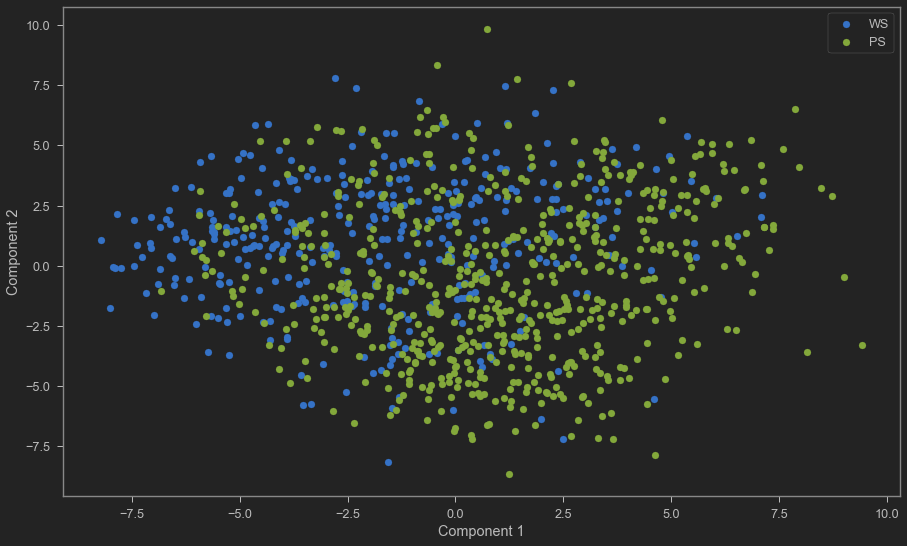

In [12]:
plt.scatter(df_components[:, 0][classes_mask], df_components[:, 1][classes_mask], label='WS')
plt.scatter(df_components[:, 0][~classes_mask], df_components[:, 1][~classes_mask], label='PS')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

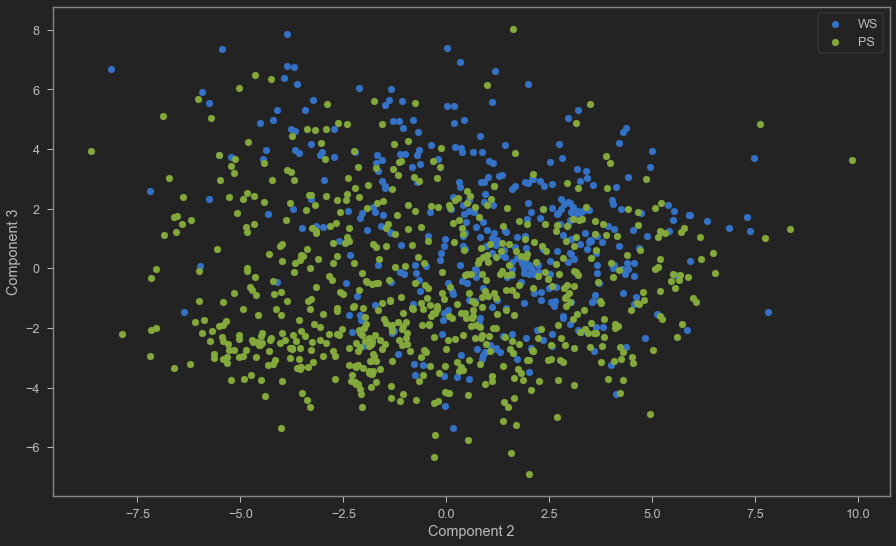

In [13]:
plt.scatter(df_components[:, 1][classes_mask], df_components[:, 2][classes_mask], label='WS')
plt.scatter(df_components[:, 1][~classes_mask], df_components[:, 2][~classes_mask], label='PS')
plt.xlabel('Component 2')
plt.ylabel('Component 3')
plt.legend()

In [15]:
df_components.shape

(1009, 20)